In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import Figure
import warnings
import os

C:\Users\nessl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
warnings.filterwarnings('ignore')

In [3]:
results = pd.read_csv("../results/paper_test/results.csv")

In [4]:
intensities = list(results.Mean)
intensities

[186.41, 99.17, 187.65, 200.29, 99.54, 112.56]

In [5]:
bck = intensities[1]
bck_2 = intensities[4]

for i in range(3):
    intensities[i] = intensities[i]-bck
    
for i in range(3,6):
    intensities[i] = intensities[i]-bck_2

intensities

[87.24, 0.0, 88.48, 100.74999999999999, 0.0, 13.019999999999996]

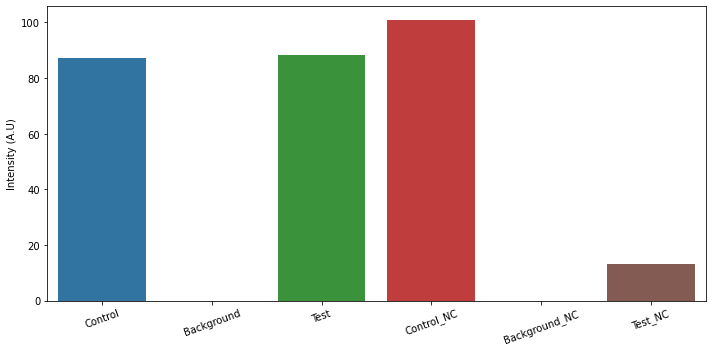

In [6]:
plt.figure(figsize=(10,5))
sns.barplot([i for i in range(len(intensities))],intensities)
plt.xticks([i for i in range(len(intensities))],['Control','Background','Test','Control_NC','Background_NC','Test_NC'],rotation= 20)
plt.ylabel("Intensity (A.U)")
plt.tight_layout()
#plt.savefig('test.png',dpi=300)
plt.show()

In [66]:
results_2 = pd.read_csv("../results/paper_test/resultspt_2.csv")

In [67]:
intensity = list(results_2.Mean)
print(intensity)

[153.04, 38.73, 92.21, 154.17, 49.16, 162.19, 183.19, 89.73, 184.22, 171.5, 48.55, 69.04, 171.34, 47.09, 71.45, 197.95, 85.29, 109.53]


In [68]:
len(intensity)

18

In [69]:
bck = []
counter = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        bck.append(intensity[i-2])
    counter+=1

bck.append(intensity[-2])
print(bck)

[38.73, 49.16, 89.73, 48.55, 47.09, 85.29]


In [70]:
counter = 1
pos = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        intensity[i]= intensity[i]-bck[pos]
        pos += 1
    else:
        intensity[i]= intensity[i]-bck[pos]
    counter +=1

print(intensity)

[114.31, 0.0, 53.48, 105.00999999999999, 0.0, 113.03, 93.46, 0.0, 94.49, 122.95, 0.0, 20.49000000000001, 124.25, 0.0, 24.36, 112.65999999999998, 0.0, 24.239999999999995]


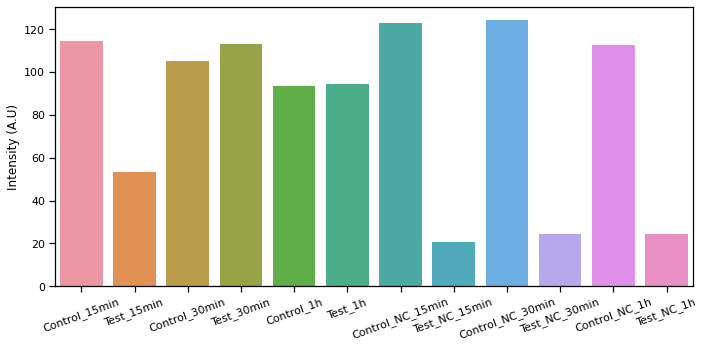

In [71]:
plt.figure(figsize=(10,5))

'''

# make the plot white

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

'''
names = ['Control_15min','Test_15min','Control_30min','Test_30min','Control_1h',
            'Test_1h','Control_NC_15min','Test_NC_15min','Control_NC_30min','Test_NC_30min','Control_NC_1h','Test_NC_1h']
intensity = [i for i in intensity if i != 0]
sns.barplot([i for i in range(len(intensity))],intensity)
plt.xticks([i for i in range(len(intensity))],names,rotation=20)
plt.ylabel('Intensity (A.U)')
plt.tight_layout()
#plt.savefig('Incubation_time_w.png',dpi=300, transparent=True)
plt.show()


In [72]:
counter = 0
test = []
control = []

for i in range(len(intensity)):
    if counter == 1:
        counter = 0
        test.append(intensity[i])
    else:
        control.append(intensity[i])
        counter+=1
    
if len(test) == len(control):
    print('Good!')
print((len(test),len(control)))
    

Good!
(6, 6)


In [73]:
test

[53.48, 113.03, 94.49, 20.49000000000001, 24.36, 24.239999999999995]

In [74]:
control

[114.31, 105.00999999999999, 93.46, 122.95, 124.25, 112.65999999999998]

In [75]:
[i for i in names if 'Test_' in i]

['Test_15min',
 'Test_30min',
 'Test_1h',
 'Test_NC_15min',
 'Test_NC_30min',
 'Test_NC_1h']

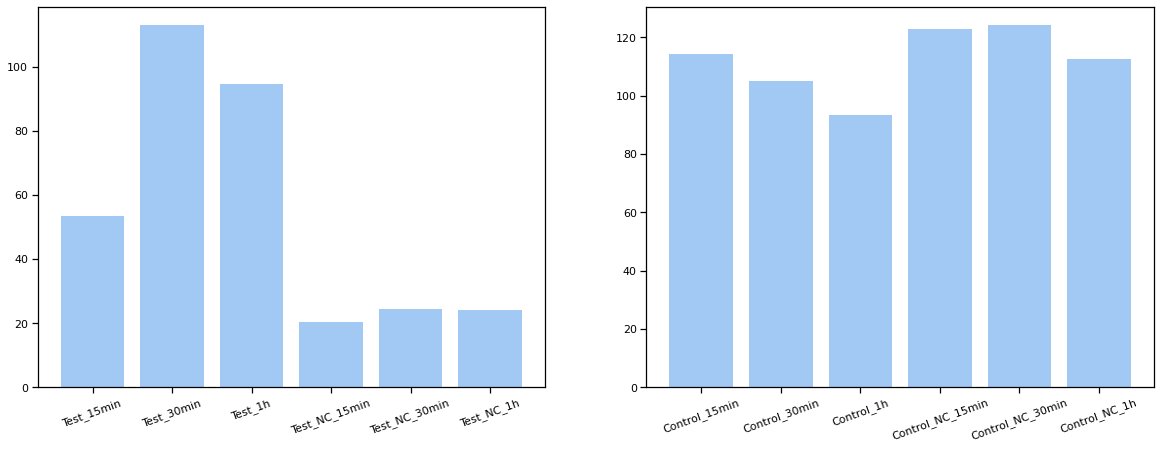

In [76]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,7)

ax[0].bar([i for i in range(len(test))],test)
ax[0].set_xticks([i for i in range(len(test))])
ax[0].set_xticklabels([i for i in names if 'Test_' in i],rotation=20)
ax[1].set_xticks([i for i in range(len(test))])
ax[1].bar([i for i in range(len(control))],control)
ax[1].set_xticklabels([i for i in names if 'Control_' in i],rotation=20)

plt.show()

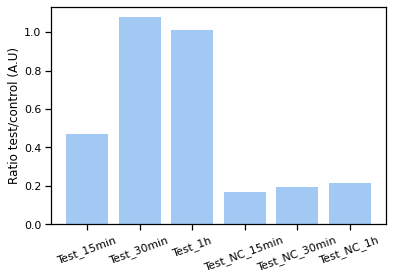

In [77]:
ratio = [test[i]/control[i] for i in range(len(test))]

sns.set_context("notebook")
sns.set_palette("pastel")

plt.bar([i for i in range(len(test))],ratio)
plt.xticks([i for i in range(len(test))],[i for i in names if 'Test_' in i],rotation=20)
plt.ylabel("Ratio test/control (A.U)")
plt.savefig("../images/Ratio_intensity_b.png",dpi=300)
plt.show()

### 1nm target, 100µM probes, 25 °C, 1h incub

In [49]:
results = pd.read_csv("../results/paper_test/Results_pt3.csv")
intensity = list(results.Mean)
print(intensity)


[179.57, 12.1, 71.24, 90.07, 20.2, 160.79]


In [50]:
bck = []
counter = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        bck.append(intensity[i-2])
    counter+=1

bck.append(intensity[-2])
print(bck)

counter = 1
pos = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        intensity[i]= intensity[i]-bck[pos]
        pos += 1
    else:
        intensity[i]= intensity[i]-bck[pos]
    counter +=1

print(intensity)

[12.1, 20.2]
[167.47, 0.0, 59.13999999999999, 69.86999999999999, 0.0, 140.59]


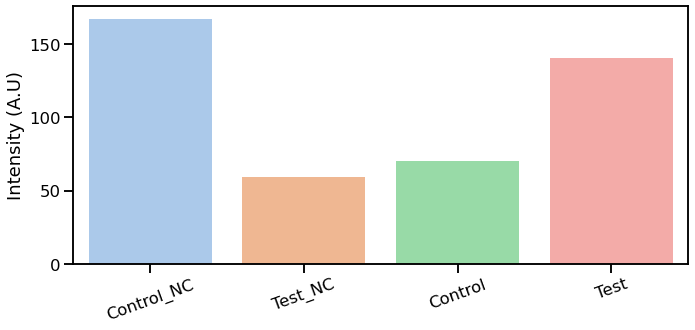

In [63]:
plt.figure(figsize=(10,5))

#'''
# make the plot white

params_w = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}

params_b = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}
plt.rcParams.update(params_b)
#'''
sns.set_context("talk")
palette = sns.color_palette("pastel",as_cmap=True)
sns.set_palette(palette)
names = ['Control_NC','Test_NC','Control','Test']
intensity = [i for i in intensity if i != 0]
sns.barplot([i for i in range(len(intensity))],intensity)
plt.xticks([i for i in range(len(intensity))],names,rotation=20)
plt.ylabel('Intensity (A.U)')
plt.tight_layout()
#plt.savefig('images/Gel_imager_w.png',dpi=300, transparent=True)
plt.show()

In [64]:
counter = 0
test = []
control = []

for i in range(len(intensity)):
    if counter == 1:
        counter = 0
        test.append(intensity[i])
    else:
        control.append(intensity[i])
        counter+=1
    
if len(test) == len(control):
    print('Good!')
print((len(test),len(control)))

Good!
(2, 2)


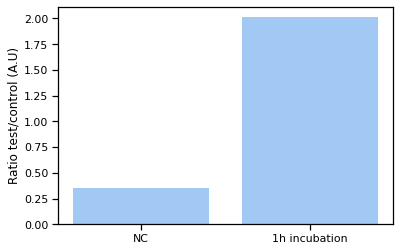

In [65]:
ratio = [test[i]/control[i] for i in range(len(test))]

sns.set_context("notebook")
sns.set_palette("pastel")

plt.bar([i for i in range(len(test))],ratio)
plt.xticks([i for i in range(len(test))],['NC','1h incubation'],rotation=0)
plt.ylabel("Ratio test/control (A.U)")
#plt.savefig("images/Ratio_intensity_gel_imager_w.png",dpi=300)
plt.show()

### Salinity

In [15]:
results = pd.read_csv("../results/paper_test/salinity.csv")
intensity = list(results.Mean)
print(intensity)

bck = []
counter = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        bck.append(intensity[i-2])
    counter+=1

bck.append(intensity[-2])
print(bck)

counter = 1
pos = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        intensity[i]= intensity[i]-bck[pos]
        pos += 1
    else:
        intensity[i]= intensity[i]-bck[pos]
    counter +=1

intensity = [i for i in intensity if i != 0]

print(intensity)

[132.88, 46.09, 181.74, 224.03, 38.28, 68.87, 221.33, 30.37, 76.84, 220.93, 29.68, 67.4, 219.93, 30.9, 58.53, 216.74, 30.5, 63.64, 222.31, 31.34, 60.21]
[46.09, 38.28, 30.37, 29.68, 30.9, 30.5, 31.34]
[86.78999999999999, 135.65, 185.75, 30.590000000000003, 190.96, 46.47, 191.25, 37.720000000000006, 189.03, 27.630000000000003, 186.24, 33.14, 190.97, 28.87]


In [16]:
counter = 0
test = []
control = []

for i in range(len(intensity)):
    if counter == 1:
        counter = 0
        test.append(intensity[i])
    else:
        control.append(intensity[i])
        counter+=1
    
if len(test) == len(control):
    print('Good!')
print((len(test),len(control)))

Good!
(7, 7)


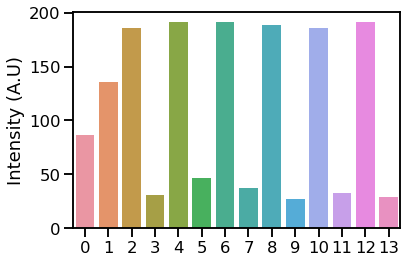

In [17]:
sns.set_context("talk")
palette = sns.color_palette("pastel",as_cmap=True)
sns.set_palette(palette)
#names = ['Control_NC','Test_NC','Control','Test']
intensity = [i for i in intensity if i != 0]
sns.barplot([i for i in range(len(intensity))],intensity)
#plt.xticks([i for i in range(len(intensity))],names,rotation=20)
plt.ylabel('Intensity (A.U)')
plt.tight_layout()
#plt.savefig('images/Gel_imager_w.png',dpi=300, transparent=True)
plt.show()

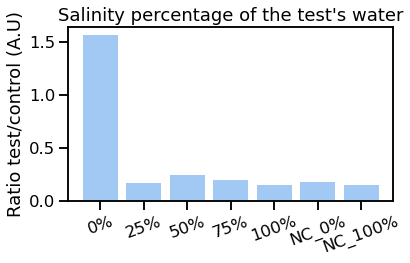

In [18]:
ratio = [test[i]/control[i] for i in range(len(test))]

sns.set_context("talk")
sns.set_palette("pastel")

names = ['0%','25%',"50%",'75%','100%','NC_0%','NC_100%']
plt.bar([i for i in range(len(test))],ratio)
plt.xticks([i for i in range(len(test))],names,rotation=20)
plt.ylabel("Ratio test/control (A.U)")
plt.title("Salinity percentage of the test's water")
plt.tight_layout()
plt.savefig("../images/Salinity_percentage_thau_water.png",dpi=300)
plt.show()

### Chemical salinity test (NaCl)

In [19]:
results = pd.read_csv("../results/paper_test/salinity_chemical.csv")
intensity = list(results.Mean)
print(intensity)

bck = []
counter = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        bck.append(intensity[i-2])
    counter+=1

bck.append(intensity[-2])
print(bck)

counter = 1
pos = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        intensity[i]= intensity[i]-bck[pos]
        pos += 1
    else:
        intensity[i]= intensity[i]-bck[pos]
    counter +=1

intensity = [i for i in intensity if i != 0]

print(intensity)

[107.66, 44.81, 206.32, 161.9, 41.64, 199.68, 216.11, 32.4, 112.3, 223.56, 28.89, 60.76, 220.07, 58.74, 71.24, 219.81, 30.16, 51.39, 223.1, 27.65, 69.03]
[44.81, 41.64, 32.4, 28.89, 58.74, 30.16, 27.65]
[62.849999999999994, 161.51, 120.26, 158.04000000000002, 183.71, 79.9, 194.67000000000002, 31.869999999999997, 161.32999999999998, 12.499999999999993, 189.65, 21.23, 195.45, 41.38]


In [20]:
counter = 0
test = []
control = []

for i in range(len(intensity)):
    if counter == 1:
        counter = 0
        test.append(intensity[i])
    else:
        control.append(intensity[i])
        counter+=1
    
if len(test) == len(control):
    print('Good!')
print((len(test),len(control)))

Good!
(7, 7)


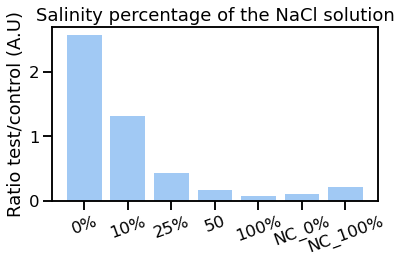

In [21]:
ratio = [test[i]/control[i] for i in range(len(test))]

sns.set_context("talk")
sns.set_palette("pastel")

names = ['0%',"10%",'25%','50','100%','NC_0%','NC_100%']
plt.bar([i for i in range(len(test))],ratio)
plt.xticks([i for i in range(len(test))],names,rotation=20)
plt.ylabel("Ratio test/control (A.U)")
plt.title("Salinity percentage of the NaCl solution")
plt.tight_layout()
plt.savefig("../images/Salinity_chemical.png",dpi=300)
plt.show()

### Salinity of Thau water (lower percentage)

In [22]:
results = pd.read_csv("../results/paper_test/salinity_thau_lower.csv")
intensity = list(results.Mean)
print(intensity)

bck = []
counter = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        bck.append(intensity[i-2])
    counter+=1

bck.append(intensity[-2])
print(bck)

counter = 1
pos = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        intensity[i]= intensity[i]-bck[pos]
        pos += 1
    else:
        intensity[i]= intensity[i]-bck[pos]
    counter +=1

intensity = [i for i in intensity if i != 0]

print(intensity)

[125.76, 45.81, 175.14, 174.97, 41.97, 199.2, 217.26, 31.56, 125.79, 212.32, 30.82, 84.51, 216.95, 30.91, 64.36, 217.52, 30.64, 66.9]
[45.81, 41.97, 31.56, 30.82, 30.91, 30.64]
[79.95, 129.32999999999998, 133.0, 157.23, 185.7, 94.23, 181.5, 53.690000000000005, 186.04, 33.45, 186.88, 36.260000000000005]


In [23]:
counter = 0
test = []
control = []

for i in range(len(intensity)):
    if counter == 1:
        counter = 0
        test.append(intensity[i])
    else:
        control.append(intensity[i])
        counter+=1
    
if len(test) == len(control):
    print('Good!')
print((len(test),len(control)))

Good!
(6, 6)


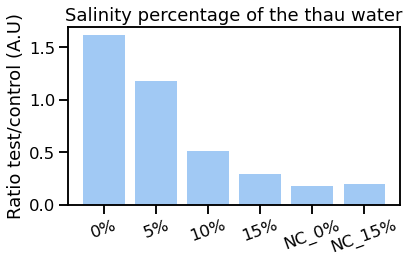

In [24]:
ratio = [test[i]/control[i] for i in range(len(test))]

sns.set_context("talk")
sns.set_palette("pastel")

names = ['0%','5%',"10%",'15%','NC_0%','NC_15%']
plt.bar([i for i in range(len(test))],ratio)
plt.xticks([i for i in range(len(test))],names,rotation=20)
plt.ylabel("Ratio test/control (A.U)")
plt.title("Salinity percentage of the thau water")
plt.tight_layout()
plt.savefig("../images/salinity_thau_lower.png",dpi=300)
plt.show()

### New targets test 

In [4]:
results = pd.read_csv("../results/paper_test/all_seq.csv")
intensity = list(results.Mean)
print(intensity)

bck = []
counter = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        bck.append(intensity[i-2])
    counter+=1

bck.append(intensity[-2])
print(bck)

counter = 1
pos = 0
for i in range(len(intensity)):
    if counter == 3:
        counter = 0
        intensity[i]= intensity[i]-bck[pos]
        pos += 1
    else:
        intensity[i]= intensity[i]-bck[pos]
    counter +=1

intensity = [i for i in intensity if i != 0]

print(intensity)

[211.15, 45.65, 87.34, 199.81, 32.53, 65.49, 209.52, 33.61, 61.97, 213.81, 31.82, 64.02, 194.64, 30.71, 62.66, 205.2, 28.88, 67.0, 219.36, 32.26, 58.03, 172.97, 44.38, 191.45, 221.82, 31.51, 60.86]
[45.65, 32.53, 33.61, 31.82, 30.71, 28.88, 32.26, 44.38, 31.51]
[165.5, 41.690000000000005, 167.28, 32.959999999999994, 175.91000000000003, 28.36, 181.99, 32.199999999999996, 163.92999999999998, 31.949999999999996, 176.32, 38.120000000000005, 187.10000000000002, 25.770000000000003, 128.59, 147.07, 190.31, 29.349999999999998]


In [5]:
counter = 0
test = []
control = []

for i in range(len(intensity)):
    if counter == 1:
        counter = 0
        test.append(intensity[i])
    else:
        control.append(intensity[i])
        counter+=1
    
if len(test) == len(control):
    print('Good!')
print((len(test),len(control)))

Good!
(9, 9)


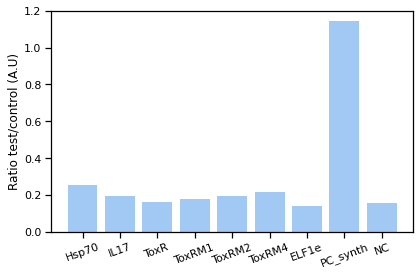

In [14]:
ratio = [test[i]/control[i] for i in range(len(test))]

sns.set_context("notebook")
sns.set_palette("pastel")

names = ['Hsp70','IL17','ToxR','ToxRM1','ToxRM2','ToxRM4','ELF1e','PC_synth','NC']
plt.bar([i for i in range(len(test))],ratio)
plt.xticks([i for i in range(len(test))],names,rotation=20)
plt.ylabel("Ratio test/control (A.U)")
plt.tight_layout()
#plt.savefig("images/paper_test/all_seq.png",dpi=300)
plt.show()